# IMDB Binary Classification

> 50,000 reviews from the Internet Movie Database  
> 25,000 reviews for training and 25,000 reviews fro testing  
> 50% negative and 50% positive reviews

In [1]:
import numpy as np
from keras import layers
from keras import models

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

Using TensorFlow backend.


## 1.Preparing the data

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [4]:
# 0: negative, 1: positive
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [5]:
print("number of train_data : ", len(train_data))
print("number of test_data : ", len(test_data))

number of train_data :  25000
number of test_data :  25000


In [6]:
# number of training set observations per class
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 12500, 1: 12500}

In [7]:
# number of test set observations per class
unique, counts = np.unique(test_labels, return_counts=True)
dict(zip(unique, counts))

{0: 12500, 1: 12500}

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# Decoding the review
word_index = imdb.get_word_index()

In [10]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [11]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
# turn lists into tensors
def vectorize_sequences(sequences, dimension=10000):
    # creates an all-zero matrix of shape(len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    # sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [16]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
y_train[:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.], dtype=float32)

## 2. Define the model

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 3. Compile the model

In [19]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [20]:
# # configuring the optimizer, losses, metrics
# from keras import optimizers
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
#              loss=losses.binary_crossentropy, 
#              metrics=[metrics.binary_accuracy])

## 4. Validate the model

In [21]:
# setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 5. Train the model

In [22]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

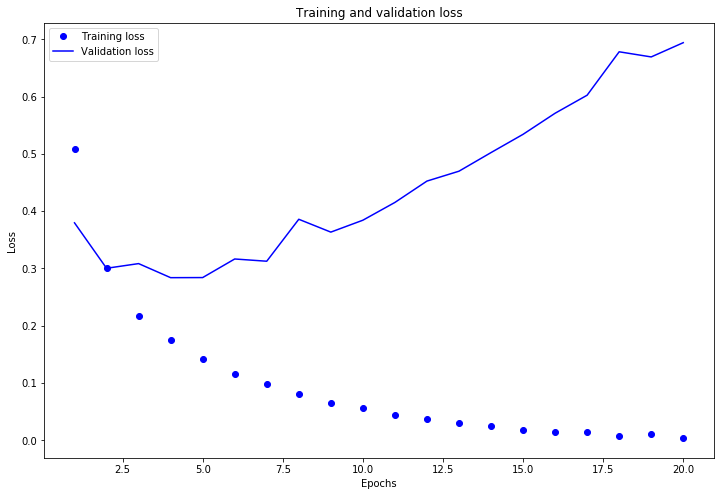

In [24]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Epoch at minimum val_loss_values
print("epoch at minimum val_loss_values :", np.argmin(val_loss_values) + 1)

epoch at minimum val_loss_values : 4


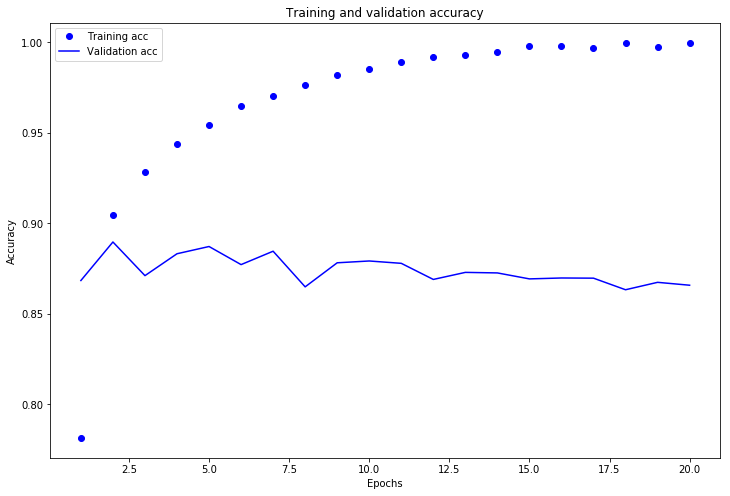

In [26]:
# Plotting the training and validation accuracy
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Retrain a model from scratch

In [27]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

# train with all training data
epoch_num = np.argmin(val_loss_values) + 1
model.fit(x_train, y_train, epochs=epoch_num, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.1679 - acc: 0.9404


# 6. Evaluate the final model with test set

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/step


In [29]:
# [loss, accuracy]
print("test loss : ", test_loss);
print("test accuracy : ", test_accuracy)

test loss :  0.323149881802
test accuracy :  0.87352


# 7. Prediction on new data using a trained network

In [30]:
model.predict(x_test)[:10]

array([[ 0.14028221],
       [ 0.99970287],
       [ 0.29558158],
       [ 0.64942032],
       [ 0.9281494 ],
       [ 0.66386443],
       [ 0.99811906],
       [ 0.00666238],
       [ 0.93580055],
       [ 0.98508006]], dtype=float32)

# The end